# **Lab 4: integration**
**Gustav Grevsten**

# **Abstract**

The purpose of this lab is to implement and test various methods for estimating the value of definite integrals using numerical methods. Specifically, it will be focused on applying Gauss quadrature and Monte Carlo quadrature. In the end, we conclude that the algorithms implemented yield results that were expected.

# **Set up environment**

In [49]:
# Load neccessary modules.
import numpy as np
import matplotlib.pyplot as plt

# **Introduction**

Numerical methods for calculating definite integrals have a wide array of applications in the fields of physics, engineering, and computer science. They allow for good approximations of integrals that would otherwise be too difficult or impossible to calculate analytically, making them a powerful tool for solving various computational problems. 

Gauss quadrature is one of these numerical methods. It relies on choosing a set of nodes and weights that are specifically designed to minimize the error given a certain number of selected nodes $n$. This works by selecting the polynomial of degree $n-1$ that interpolates the function at the nodes and matches the function at as many points as possible.


Another method is Monte Carlo quadrature. The method is based on the principle that the integral of a function can be approximated by the average of the function values at a set of randomly chosen points in the integration domain. This requires a large number of points to be randomly sampled from a uniform distribution over the domain, and the function is evaluated at each point. The resulting function values are then averaged to obtain an estimate of the integral.

# **Method**

In this lab, we will employ Gauss quadrature, both the 2-point Gauss rule to integrate over functions $f: \mathbb{R} → \mathbb{R}$ and the 3-point rule to integrate functions $g: \mathbb{R}^2 → \mathbb{R}$ over triangles in the plane. We will also employ Monte Carlo integration to integrate over single variable functions.

The n-point Gauss rule works by first transforming the interval of integration from the original interval $[b,a]$ to the interval $[-1,1]$ by the coordinate map $f(x) → f(F(\hat{x})) = \frac{(a-b)\hat{x}}{2} + \frac{a+b}{2}$. This transformed, single variable, real valued function is then evaluated at $n$ points $x_i$ and the results are multiplied by pre-determined weights $w_i$. For the 2-point Gauss rule, these values are given as $w_0 = w_1 = 1, x_0 = \frac{1}{\sqrt{3}}, x_1 = -\frac{1}{\sqrt{3}}$

The algorithm for the 2-point Gauss rule is implemented as python code below:

In [50]:
def gauss_two(f, interval = [0,1]):
  x1 = -1/np.sqrt(3)
  x2 = 1/np.sqrt(3)
  c1 = 1
  c2 = 1
  a, b = interval[1], interval[0]

  result = ((a-b)/2)*(c1*f(0.5*(b-a)*(x1) + 0.5*(a+b)) + c2*f(0.5*(b-a)*(x2) + 0.5*(a+b)))

  return result

Next, we will implement the 3-point edge midpoint rule for integrating functions over reference triangles in $\mathbb{R}^2$, defined by three points in the plane. For this method, we evaluate the function $f(x,y)$ at the midpoints of each side of the given triangle and multiply the results by given weights $w_0 = w_1 = w_2 = \frac{1}{6}$.

The algorithm for the 3-point edge midpoint rule is implemented as python code below:

In [51]:
def gauss_three(f, triangle = [[0,0], [0,1], [1,0]]):
  x0 = np.add(triangle[0], np.multiply(0.5, np.subtract(triangle[1], triangle[0])))
  x1 = np.add(triangle[0], np.multiply(0.5, np.subtract(triangle[2], triangle[0])))
  x2 = np.add(triangle[1], np.multiply(0.5, np.subtract(triangle[2], triangle[1])))
  w0 = 1/6
  w1 = 1/6
  w2 = 1/6

  result = w0 * f(x0) + w1 * f(x1) + w2 * f(x2)

  return result

Finally, we implement the Monte Carlo quadrature. For this method, we sample $n$ points $x_i$ from the integration interval $[b,a]$ and evaluate the function at those points. The mean value $\frac{|a-b|}{n}\sum_{i=1}^{n} f(x_i)$ thus gives us an approximation for the value of the integral. This works by approximating the "weighted average height" of the function multiplied by its width, which corresponds to the area under the curve. 

The algorithm for the Monte Carlo quadrature is implemented as python code below:

In [52]:
def monte_carlo(f, n = 10**5, interval = [0,1]):
  a, b = interval[1], interval[0]

  result = 0
  for i in range(n):
    x = np.random.uniform(b,a)
    result += f(x)
  result *= (1/n) * np.absolute(a-b)

  return result

As an additional task, the Monte Carlo quadrature method was implemented as a subroutine for calculating the integral $\int_{-1}^{1}P_n(x)f(\frac{(b-a)x}{2} - \frac{a+b}{2})dx$ and projecting functions onto the legendre polynomials of degree 0 and 1 (As seen in lab 3).

In [53]:
def monte_carlo_pw(f, x0, x1, n, shift, degree):
  a, b = shift[1], shift[-1]
  determinant = (a-b)/(x1-x0)
  result = 0
  for i in range(n):
    x = np.random.uniform(x0,x1)
    if degree:
      result += f(0.5*(b-a)*(x) + 0.5*(a+b))*x
    else:
      result += f(0.5*(b-a)*(x) + 0.5*(a+b))
  result *= (1/n) * (x1-x0)

  return result

def pw_linear_one_d(f, mesh):
  steps = len(mesh)
  A = np.zeros((2, steps))
  for i in range(steps-1):
    A[0,i] = (1/2)*monte_carlo_pw(f, -1, 1, 10**4, [mesh[i], mesh[i+1]], 0)
    A[1,i] = (3/2)*monte_carlo_pw(f, -1, 1, 10**4, [mesh[i], mesh[i+1]], 1)
  result = []
  for j in range(steps-1):
    result.append(A[0,j] + A[1,j]*-1)
  result.append(A[0,j] + A[1,j]*1)
  return result

# **Results**

We test all of the algorithms presented in the Methods section below. To start, 2-point Gauss quadrature should give an exact solution to integrals over cubic polynomials. The integral $\int_{0}^{1}4x^3 + 3x^2 + 2x + 1 dx$ evaluates exactly to $4$:

In [54]:
def f(x):
  return 4*x**3  + 3*x**2 + 2*x + 1

print(gauss_two(f, [0,1]))

3.9999999999999996


There is a very small discrepancy in this result, but this is likely due to the floating point error that comes from the square root calculation in the 2-point Gauss quadrature function.

Next, we will test the 3-point edge midpoint rule over the triangle with corners in the coordinates $(0,0), (1,0), (0,1)$. This one should give exact results over quadratic polynomials. The integral $\int_{0}^{1-x}\int_{0}^{1}6x^2 + 5y^2 + 4xy + 3x + 2y + 1 dydx$ evaluates exactly to $\frac{29}{12} = 2.41\overline{6}$:

In [55]:
def g(xy):
  x, y = xy[0], xy[1]
  return 6*x**2  + 5*y**2 + 4*x*y + 3*x + 2*y + 1

print(gauss_three(g, [[0,0], [1,0], [0,1]]))

2.4166666666666665


Again, we notice a very small error, likely due to floating point inaccuracy.

Finally, we test the Monte Carlo quadrature method. We will use it to approximate the integral $\int_{0}^{\pi}sin(x)dx = 2$. The error for this one should converge with the rate $\frac{1}{\sqrt{n}}$. To check this, we sample $10^3$ solutions for values of $n$ between 1 and $10^3$ and plot the average error:

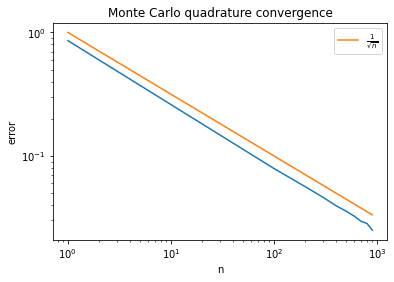

In [60]:
def h(x):
  return np.sin(x)

MC = []
ROOT = []
N = []
for n in range(1, 10**3, 100):
  avg = []
  for i in range(10**3):
    avg.append(np.absolute(2 - monte_carlo(h,n,[0,np.pi])))
  MC.append(np.mean(avg))
  ROOT.append(1/np.sqrt(n))
  N.append(n)

plt.loglog(N, MC)
plt.loglog(N, ROOT, label  = r'$\frac{1}{\sqrt{n}}$')
plt.title("Monte Carlo quadrature convergence")
plt.legend()
plt.xlabel("n")
plt.ylabel("error")
plt.show()

As we can clearly see from the plot, the Monte Carlo quadrature method decreases the error inverse proportional to the square root of $n$.

Additionally, we test the results of generating a piece wise linear interpolation of the function $sin(x)$ using the Monte Carlo Quadrature as a subroutine this time.

In [61]:
def f(x):
  return np.sin(x)

test = [3, 5, 10, 100]

for t in test:
  mesh = np.linspace(0, np.pi, t)

  result = pw_linear_one_d(f, mesh)

  exact = []

  for x in mesh:
    exact.append(f(x))

  avg = 0
  for i in range(len(result)):
    avg += np.absolute(result[i] - exact[i])
  print("Average error for a mesh of " + str(len(mesh)) + " points: " + str(avg/len(result)))

Average error for a mesh of 3 points: 0.6658663655814095
Average error for a mesh of 5 points: 0.4084123084851122
Average error for a mesh of 10 points: 0.20519651556977317
Average error for a mesh of 100 points: 0.021009226112555228


As can be seen, there is still a convergence for the error as the number of points in the mesh increases.

# **Discussion**

As expected, we were able to find exact solutions to the various polynomials using the Gauss quadrature method and the Monte Carlo quadrature showed correct convergence and worked for calculating inner products in $L^2(-1,1)$. It should be noted that there are many other numerical methods for approximating integrals, some of which may be more easily graspable and easier to implement. For example, for single variable functions, Riemann sums, such as the trapezoidal rule, can also provide accurate results while being easy to implement and intuit.